# Perceptron Learning 
Apply the perceptron learning to binary classification for randomly generated continuous 2d dataset. Note that perceptron learning algorithm converges when input dataset is linearly separable.



## 0. Dataset preparation

### i) Data generation 

Generate separable random data $X$ = {$\vec{x}^{[1]}$,$\vec{x}^{[2]}$, ...,$\vec{x}^{[n]}$} with each $\vec{x}^{[n]}$ = ($x_1,x_2)^T$. Each $\vec{x}^{[n]}$ is assigned to target $\vec{t}^{[n]}$ $\in$ {1,2}.

Half of dataset wich follows $\vec{x}^{[n]} \sim \mathcal{N}(\mu_+,\,\sigma_+)$ need to be assigned  to target $\vec{t}^{[n]}$ = 1, and  $\vec{x}^{[n]} \sim \mathcal{N}(\mu_-,\,\sigma_-)$ is $\vec{t}^{[n]}$ = -1.

Select means (~µ+, ~µ−) and (σ+, σ−) wisely to create separable data

In [ ]:
import numpy as np

In [ ]:
def dataset(n_samples, mu_p, sigma_p, mu_n, sigma_n):
    # create input dataset
    p_data = np.random.normal(mu_p, sigma_p, size=(n_samples//2, 2))
    n_data = np.random.normal(mu_n, sigma_n, size=(n_samples//2, 2))

    # create positive and negative labels
    p_label = np.full(n_samples//2, 1, int)
    n_label = np.full(n_samples//2, -1, int)

    # concatenate positive and negative data
    X = np.concatenate((p_data, n_data), axis=0) 
    T = np.concatenate((p_label, n_label))

    return X, T

In [ ]:
number_of_samples=100
mu_pos=np.array([1,7])
sigma_pos=np.array([1,1])
mu_neg=np.array([5,2])
sigma_neg=np.array([1,1])

X, T = dataset(number_of_samples, mu_pos,sigma_pos,mu_neg,sigma_neg)

### ii) Linear separability Test 

A decision boundry $a = f_{\vec w}(\vec x) = w_0 + w_1 x_1 + w_2 x_2$ linearly separates the data $(X,T)$ if $\forall n: a^{[n]} t^{[n]} > 0$ for $a^{[n]} = f_{\vec w}(\vec x^{[n]})$.  

However, our data samples are not always separable since they are generated randomly. To check if our dataset is separable, we will manually calculate the separaing line $a$ and then check if all dataset safisfies above condition. 

Note that the separating line is orthogonal to the vector $\overrightarrow{\vec\mu_- \vec\mu_+}$, that the normal of the line $(w_1, w_2)^T$ is orthogonal to the line, and that $w_0$ should be selected such that the line $\vec w$ is in the middle of $\vec\mu_+$ and $\vec\mu_-$.

In [ ]:
def separability_test(X, T, w):
    a = np.dot(X,w[1:]) + w[0]
    res = np.multiply(a,T)

    return all(i > 0 for i in res)

In [ ]:
diff = mu_pos - mu_neg 
mean = (mu_pos + mu_neg)/2 

w_manual = np.array([-np.dot(mean,diff), diff[0], diff[1]]) # [w0,w1,w2]
print(w_manual)

[-10.5  -4.    5. ]


In [ ]:
# w_manual = np.array([-np.sum(((mu_pos+mu_neg)/2)*(mu_pos-mu_neg))]+list(mu_pos-mu_neg))

In [ ]:
if separability_test(X, T, w_manual):
  print("The data is separated by the manually selected line")
else:
  print("The anually selected line does not separate the data")

The data is separated by the manually selected line


## 1. implement Perceptron model

The perceptron is defined as the line $a = f_{\vec w}(\vec x)$ that is thresholded using the sign function $\mathrm{sign}(a) = \begin{cases} +1 &\text{if } a \geq 0\\ -1 & \text{otherwise.}\end{cases}$
Implement a function that computes and returns the perceptron for a given data point $\vec x$ and line parameters $\vec w$.

In [ ]:
def perceptron(x, w):
    return np.sign(np.dot(x, w[1:]) + w[0])

## 2. Update W with Percentron Learning Algorithm

The perceptron learning rule is defined as follows:  

* First, the weights $\vec w = (w_0, w_1, w_2)^T$ is initialized randomly.
* Then, for each sample $(x,t)$ of the dataset we check if the sample is correcly classified as $H(f_{\vec w}(\vec x)) t > 0$.
* If the sample is classified incorrectly, the weights are adapted: $w_0 = w_0 + t$, $w_1 = w_1 + tx_1$, $w_2 = w_2 + tx_2$.
* This step is repeated until all samples are classified correcly.

In [ ]:
def perceptron_learning(X, T, w):
    
    w_star = w.copy()

    while separability_test(X, T, w_star) == False:
      for x, t in zip(X, T):
        if perceptron(x,w_star)*t < 0:
          w_star += t * np.array([1, x[0], x[1]])

    return w_star

## 3. Dataset and Decision boundary Visualization

Plot the data points such that positive data with green dots, and negative data with red dots.

Then, we need to compute the decision boundary parameters. For this purpose, we define the separating line in cartesian coordinates $f_{\vec w}(\vec x) = 0$ and solve it to the paramteric form $x_2 = \beta x_1 + \gamma$.

In [ ]:
from matplotlib import pyplot

In [ ]:
# 1. initialize ramdom w0 between -1 to 1 
w_initial = np.random.uniform(-1,1,size=(3,))

# 2. learn oprimized W with perceptron learning 
w_star = perceptron_learning(X, T, w_initial)

# 3. calculate line parameters
def line_parameters(w):
  beta = - w[1] / w[2]
  gamma = - w[0] / w[2]
  return beta, gamma


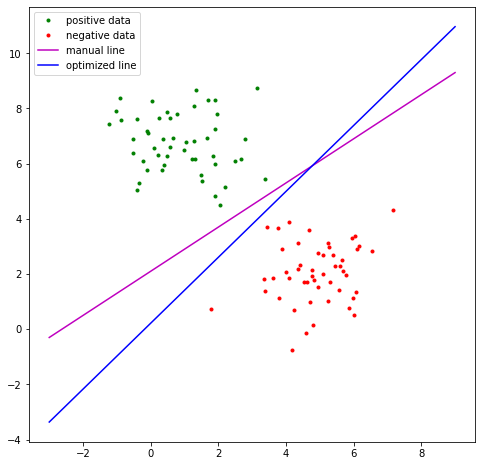

In [ ]:
pyplot.figure(figsize=(8,8))

# plot the positive data points
pyplot.plot(X[T==1, 0], X[T==1, 1], "g.", label="positive data")

# plot the negative data points
pyplot.plot(X[T==-1, 0], X[T==-1, 1], "r.", label="negative data")

# create datapoints for manual line  
beta_m, gamma_m = line_parameters(w_manual)
x1 = np.array([-3, 9])
x2_m = beta_m * x1 + gamma_m

# compute line parameters for optimized line
beta_o, gamma_o = line_parameters(w_star)
x2_o = beta_o * x1 + gamma_o

# plot lines (might need to call this function twice for the two lines)
pyplot.plot(x1, x2_m, "m-", label="manual line")
pyplot.plot(x1, x2_o, "b-", label="optimized line")

# make the plot more beautiful
pyplot.legend()